In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest
import numpy as np


In [8]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [9]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

## Load data and index Day 1

In [33]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'general_locomotion.csv')
df.path_length = df.path_length/1000
df = df[df.day=='D1']
df.thigmotaxis = df.thigmotaxis/60


## Make plots for each measure. Use mean for parametric analyses and median for non-parametric

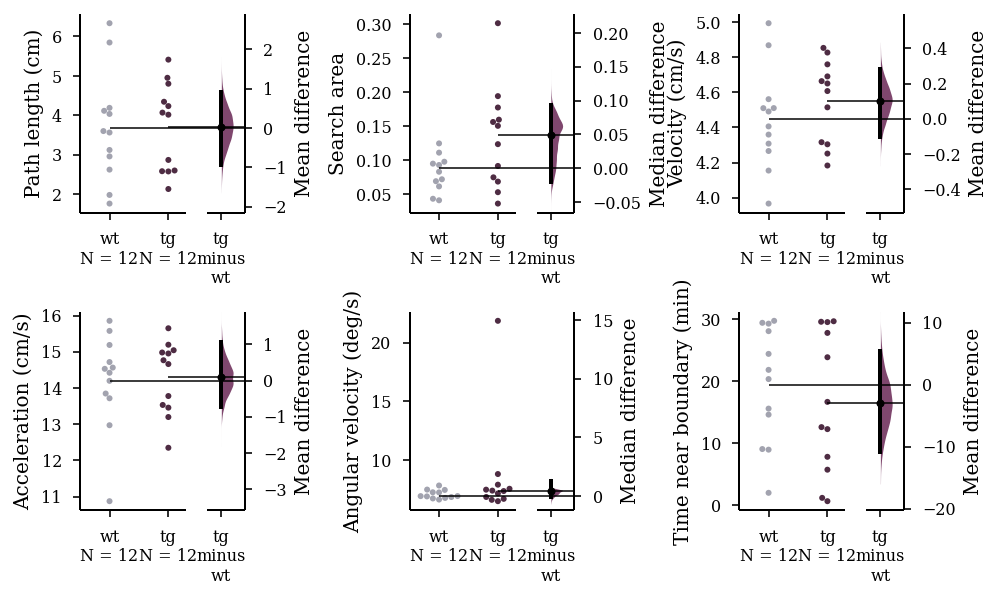

In [35]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="path_length")
dabest_obj.mean_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Path length (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="search_area")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Search area")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_velocity")
dabest_obj.mean_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Velocity (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_acceleration")
dabest_obj.mean_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Acceleration (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_angular_velocity")
dabest_obj.median_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Angular velocity (deg/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="thigmotaxis")
dabest_obj.mean_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Time near boundary (min)")


plt.savefig(fig_save_path+'locomotion_d1.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'locomotion_d1.png',dpi=300,bbox_inches='tight')


In [30]:
df = pd.read_csv(data_path+'general_locomotion.csv')
df.path_length = df.path_length/1000
df = df[df.day=='D2']
df.thigmotaxis = df.thigmotaxis/60

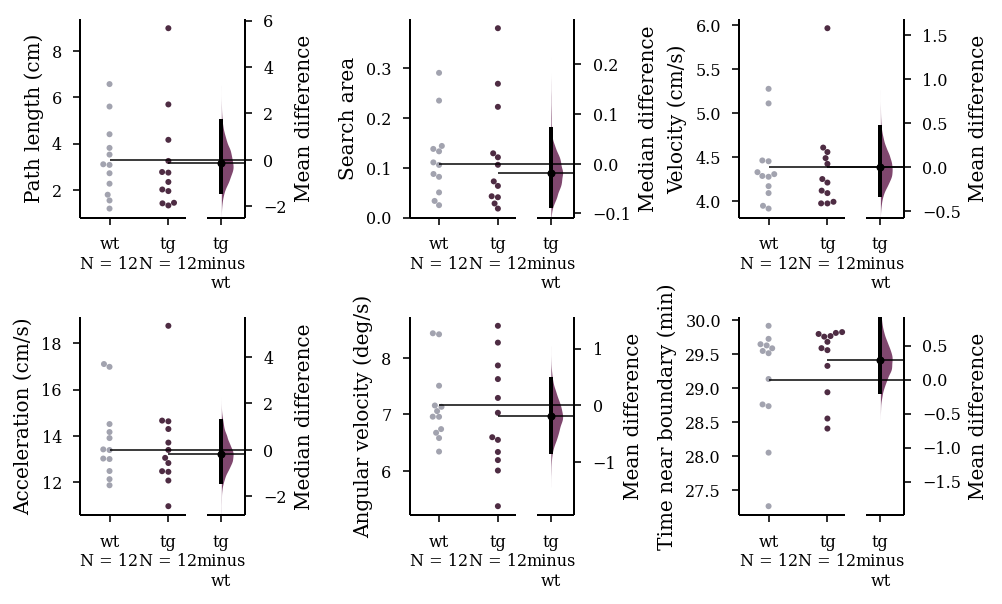

In [32]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="path_length")
dabest_obj.mean_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Path length (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="search_area")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Search area")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_velocity")
dabest_obj.mean_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Velocity (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_acceleration")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Acceleration (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_angular_velocity")
dabest_obj.mean_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Angular velocity (deg/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="thigmotaxis")
dabest_obj.mean_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Time near boundary (min)")


plt.savefig(fig_save_path+'locomotion_d2.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'locomotion_d2.png',dpi=300,bbox_inches='tight')
